<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Weight_Initialization_Techniques_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve Emergency vs Non-Emergency vehicle classification

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol><ol>Setting up the weight initialization technique</ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the Dataset.zip file
!ls /content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/*jpg |wc -l

2352


In [4]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [5]:
# defining the seed value
seed = 42

In [6]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [7]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [8]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [9]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [11]:
# normalizing the pixel values
X = X / X.max()

In [12]:

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [13]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### Setting up the weight initialization technique

In [15]:
# importing different initialization techniques
from keras.initializers import random_normal, glorot_normal, he_normal

In [16]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(100, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=he_normal(seed=seed)))

## 5. Compiling the model

In [17]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [18]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model

In [19]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 9s 472ms/step - loss: 0.7363 - accuracy: 0.5765 - val_loss: 0.6863 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 2s 141ms/step - loss: 0.6853 - accuracy: 0.5863 - val_loss: 0.6857 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 2s 122ms/step - loss: 0.6820 - accuracy: 0.5863 - val_loss: 0.6891 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 99ms/step - loss: 0.6790 - accuracy: 0.5863 - val_loss: 0.6859 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 84ms/step - loss: 0.6787 - accuracy: 0.5863 - val_loss: 0.6888 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 111ms/step - loss: 0.6789 - accuracy: 0.5863 - val_loss: 0.6865 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 1s 114ms/step - loss: 0.6785 - accuracy: 0.5863 - val_loss: 0.6892 - val_accuracy: 0.5609
E

## 8. Evaluating model performance

In [23]:
y_pred = model.predict(X_valid)
y_pred = np.where(y_pred < 0.5, 0, 1)

23/23 [==============================] - 0s 12ms/step


In [24]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.5609065155807366 %


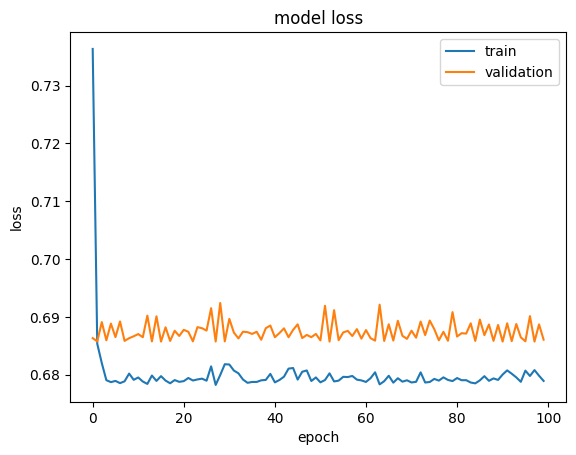

In [25]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Comparison between random, glorot and he normal initialization
![alt text](https://drive.google.com/uc?id=1eneZC2OxBaDmU2ikhboiIADbuBksC18L)